<a href="https://colab.research.google.com/github/ghlim40/BT/blob/main/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EC%98%88%EC%B8%A1_%EB%B0%8F_%EC%9E%90%EB%8F%99%EB%A7%A4%EB%A7%A4_%EC%97%B0%EC%8A%B5%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **필요한 모듈 설치 및 입력**

In [10]:
!pip install pyjwt #pyubi록 설치를 위해 필요
!pip install pyupbit
!pip install datetime
!pip install numpy
!pip install datetime
!pip install schedule
!pip install Prophet
#!pip install pandas
#!pip install keras

     |████████████████████████████████| 51 kB 466 kB/s 
     |████████████████████████████████| 251 kB 9.8 MB/s 
     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640387 sha256=a300b7c1a1bc0579922fd91a4ab1b7e64236f96e04bc5baf15bc908a14f85f35
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatib

In [11]:
import pyupbit
import pandas
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import time
from tqdm import tqdm
import seaborn as sns
import time, calendar
import schedule
from fbprophet import Prophet

## **데이터를 가져올 코인 설정 및 범위 설정**

In [3]:
#KRW거래소에서 가져올수있는 코인 목록
print(pyupbit.get_tickers(fiat="KRW"))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC', 'KRW-XRP', 'KRW-ETC', 'KRW-OMG', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-REP', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLY', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-MFT', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-SRM', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 

In [4]:
#가져오고자 하는 코인 이름
coin = "KRW-BTC"

#가져오고자 하는 코인의 주기
#day/minute1/minute3/minute5/minute10/minute15/minute30/minute60/minute240/week/month
coinInterval = "minute60"

#현재 날짜 가져오기
coinTime = datetime.today().strftime("%Y%m%d")

#가져올 행 개수 수동수정필요
coinCount = 1000

In [5]:
#count <= 불러올 행의 개수, 
#to <= interval변수의 기준으로 한단위 전 값까지 가져옴 1min일 경우 1분전 1day일 경우 어제값
dfUpbit = pyupbit.get_ohlcv(coin,count=1000,interval=coinInterval)
dfUpbit_yesterday = pyupbit.get_ohlcv(coin,count=1,interval='day',to=coinTime)
rowCount=len(dfUpbit)

In [7]:
#데이터 프레임 한글로 번역
df_predict = dfUpbit.reset_index()
df_predict['날짜'] = df_predict['index']
df_predict['시가'] = df_predict['open']
df_predict['종가'] = df_predict['close']
df_predict['저가'] = df_predict['low']
df_predict['고가'] = df_predict['high']
df_predict['거래량'] = df_predict['volume']
data_predict = df_predict[['날짜','시가','종가','저가','고가','거래량']]

## **설정값을 보여주는 모니터**

In [8]:
data_predict

,날짜,시가,종가,저가,고가,거래량
0,2022-01-22 22:00:00,44242000.0,44020000.0,43955000.0,44616000.0,419.436828
1,2022-01-22 23:00:00,44028000.0,43465000.0,43429000.0,44160000.0,295.968330
2,2022-01-23 00:00:00,43443000.0,43263000.0,43211000.0,43747000.0,359.593859
3,2022-01-23 01:00:00,43263000.0,43312000.0,43002000.0,43746000.0,418.345776
4,2022-01-23 02:00:00,43365000.0,42971000.0,42916000.0,43486000.0,263.015119
...,...,...,...,...,...,...
995,2022-03-05 11:00:00,48208000.0,48087000.0,47956000.0,48289000.0,434.509771
996,2022-03-05 12:00:00,48087000.0,48387000.0,48011000.0,48517000.0,288.346545
997,2022-03-05 13:00:00,48387000.0,48133000.0,48023000.0,48460000.0,233.081709
998,2022-03-05 14:00:00,48133000.0,48264000.0,48000000.0,48264000.0,152.108009


In [ ]:
#float타입으로 coin변수에 해당력 코인 현재가격 출력
print(pyupbit.get_current_price(coin))

46728000.0


In [ ]:
print("\n\n불러온 데이터 행 개수 :",coinCount)
print("\n불러온 범위 :\n",dfUpbit.head(1),"\n\n부터\n\n ",dfUpbit.tail(1),"\n\n까지 불러옴")



불러온 데이터 행 개수 : 1000

불러온 범위 :
                   open        high  ...      volume         value
2021-12-19  58400000.0  58632000.0  ...  190.463386  1.112997e+10

[1 rows x 6 columns] 

부터

                             open        high  ...      volume         value
2022-01-29 17:00:00  46841000.0  46900000.0  ...  112.154884  5.246394e+09

[1 rows x 6 columns] 

까지 불러옴


Text(0.5, 1.0, 'KRW-BTC')

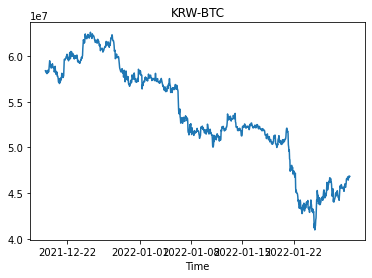

In [ ]:
plt.xlabel('Time')
plt.plot(data_predict['날짜'],data_predict['시가']) #그래프를 그릴 항목 설정
plt.rcParams['figure.figsize'] = [20, 10] #그래프 사이즈 설정
plt.title(coin)

## **이동평균선 구하기**

In [ ]:
#day/minute1/minute3/minute5/minute10/minute15/minute30/minute60/minute240/week/month
dfUpbit_ma = pyupbit.get_ohlcv(coin,count=100,interval='day')
dfUpbit_ma

,open,high,low,close,volume,value
2021-10-22 09:00:00,76396000.0,77640000.0,74123000.0,74364000.0,11856.844443,9.033713e+11
2021-10-23 09:00:00,74350000.0,75580000.0,73247000.0,74830000.0,7080.042349,5.293415e+11
2021-10-24 09:00:00,74830000.0,75530000.0,73635000.0,74501000.0,6110.378599,4.548145e+11
2021-10-25 09:00:00,74501000.0,77024000.0,74210000.0,76200000.0,6856.577760,5.212250e+11
2021-10-26 09:00:00,76250000.0,76480000.0,73002000.0,73293000.0,8258.181432,6.198245e+11
...,...,...,...,...,...,...
2022-01-25 09:00:00,44764000.0,45572000.0,43511000.0,44909000.0,6937.037407,3.084795e+11
2022-01-26 09:00:00,44905000.0,47460000.0,44520000.0,45100000.0,10144.394427,4.655031e+11
2022-01-27 09:00:00,45100000.0,45844000.0,43786000.0,45809000.0,7488.144801,3.350130e+11
2022-01-28 09:00:00,45800000.0,46890000.0,45060000.0,46588000.0,5565.154275,2.547627e+11


In [ ]:
#데이터 프레임 슬라이싱을 통해 날짜와 종가만 남김
data_predict_ma = dfUpbit_ma.loc[:,['open','close']]
data_predict_ma

,open,close
2021-10-22 09:00:00,76396000.0,74364000.0
2021-10-23 09:00:00,74350000.0,74830000.0
2021-10-24 09:00:00,74830000.0,74501000.0
2021-10-25 09:00:00,74501000.0,76200000.0
2021-10-26 09:00:00,76250000.0,73293000.0
...,...,...
2022-01-25 09:00:00,44764000.0,44909000.0
2022-01-26 09:00:00,44905000.0,45100000.0
2022-01-27 09:00:00,45100000.0,45809000.0
2022-01-28 09:00:00,45800000.0,46588000.0


In [ ]:
#5일 이평선 
ma5 = data_predict_ma['close'].rolling(window=5).mean()

#20일 이평선
ma20  = data_predict_ma['close'].rolling(window=20).mean()

#현재가격
price = pyupbit.get_current_price(coin)

In [ ]:
#계산한 이동평균선 데이터프레임 병합
data_predict_ma.insert(2,"MA5",ma5)
data_predict_ma.insert(3,"MA20",ma20)

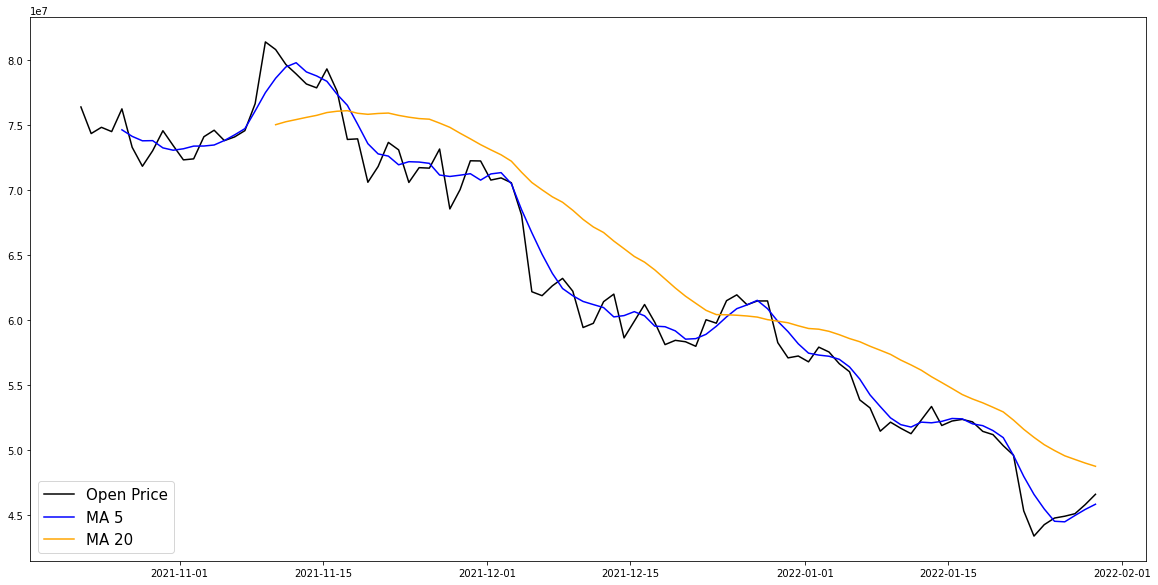

In [ ]:
#그래프 표임
plt.plot(data_predict_ma.index, data_predict_ma['open'],color='k', label="Open Price")
plt.plot(data_predict_ma.index, data_predict_ma['MA5'], color='blue', label="MA 5")
plt.plot(data_predict_ma.index, data_predict_ma['MA20'], color='orange', label="MA 20")
plt.axis('tight')
plt.legend(loc='lower left',fontsize=15)
plt.show()

## Prophet을 이용한 시계열 분석


In [12]:
df_predict = pyupbit.get_ohlcv(coin,count=5000, interval="minute60")
df_predict

df_predict = df_predict.reset_index()
df_predict['ds'] = df_predict['index']
df_predict['y'] = df_predict['close']
data_predict = df_predict[['ds','y']]
data_predict

,ds,y
0,2021-08-09 01:00:00,50623000.0
1,2021-08-09 02:00:00,50599000.0
2,2021-08-09 03:00:00,50631000.0
3,2021-08-09 04:00:00,50722000.0
4,2021-08-09 05:00:00,50889000.0
...,...,...
4995,2022-03-05 11:00:00,48087000.0
4996,2022-03-05 12:00:00,48387000.0
4997,2022-03-05 13:00:00,48133000.0
4998,2022-03-05 14:00:00,48264000.0


In [13]:
model = Prophet()
model.fit(data_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [14]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

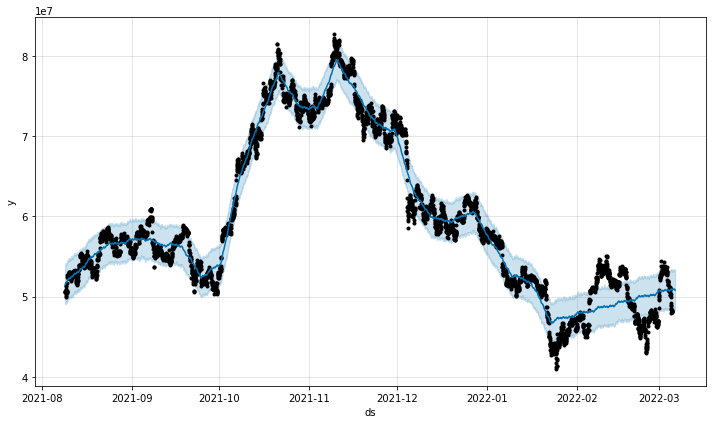

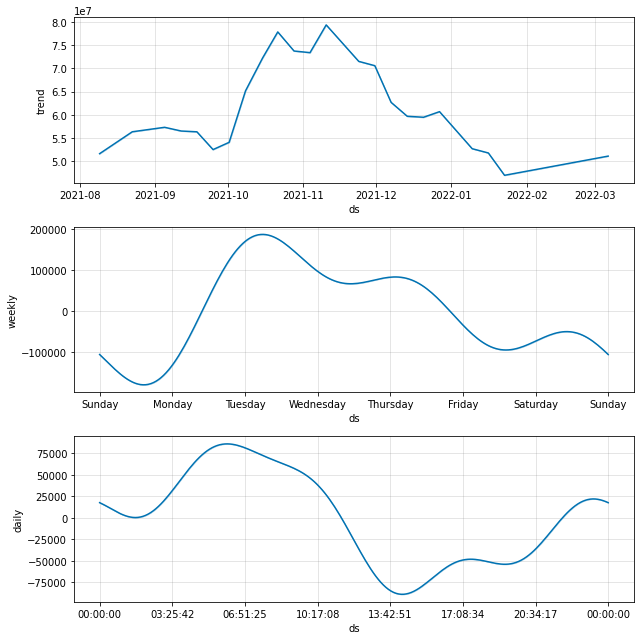

In [15]:
#그래프1
fig1 = model.plot(forecast)
#그래프2
fig2 = model.plot_components(forecast)

In [16]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

48206000.0

In [17]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]
#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf2 = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

50929222.0596071

In [18]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  48206000.0
종가의 가격:  50929222.0596071
